Dec 2: Data visualization due

    Plot the data in various relevant ways.
    Describe clearly what these plots tell you.
    Use the plots to identify outliers, bad data, etc
    Use the plots to identify patterns and relations in the data.
    Repeat the process as necessary to get a clear view of what is going on.

At this point, you should have a rough draft of your final report. The final product should loosely follow this outline:

    Introduction: briefly describe the data, why it might be interesting, and what you hope to find out about it.
    Data Collection: describe the source of the data and the methods used for gathering and cleaning it, including feature engineering.
    Data Visualization: plots and analysis of the data.
    Conclusion: what are the main takeaways from your analysis?

Remember that the final draft may be no longer than 12 pages. Choose carefully which visualizations to use, what information to print, and so on.

# Lost Person Study - Garret Carver

The purpose of this project is to analyize the statictics of lost people in the hopes of being able to better predict where they go when they get lost in the woods. 

Due to the fact that I am not able to get the proprietary data I have transitioned to generating my own data. This will be accomplished in several steps.

A) Develop the ability to handle the topographic data.

   1. Load data from topo files. 
   2. Change unit type i.e. meters to kilometers.
   3. Select an arbitrary 'window' of the topography file.
   4. 'Upsample' the data with an arbitrary new resolution. 
    
B) Develop tools to analyze the topographic data.

   1. Measure 'overland' distance between any points. Draw a 'circle' with a fixed 'overland' radius around any
      given point.
   2. Define a 'View area' i.e. an area that is theoretically viewable by a 1.75 meter tall person
   3. Measure the slope in all eight directions around a given point.
   4. Define a function that maps a given slope to a possible walking speed on (0 km/hr , 4.8 km/hr)
   5. Develop a time dependent function that will walk in a straight line until a time runs out, where the
      walking velocity is determined by the slope. Draw a 'circle' with a radius dependent on a given time around 
      any given point.
   6. Develop a probability distribution over the slope in each of the eight directions that favors a new 
      direction and maximizing speed.
   7. Develop a random walk that will choose a direction determined by B.7.
   8. Use the random walk to construct a markov chain representation of the map.
    
C) Extract features from topography data.
    
   1. Extract the longitude/latitude distance between steps in the topography grid.
   2. Calculate a gradient for the topography.
   3. Convert the gradient information into degrees.
   4. Determine how many kilometers are in a degree of latitude/longitude.
   5. Determine how many kilometers are in a 'step' between grid points.
   6. Determine an average walking speed in kilometers per hour.
   7. Determine how long it takes given the average walking speed to travel between grid points for both 
      longitude and latitude.
      
D) Plotting data for December 2
    
   1. Plot results from random walk


In [1]:
from topo_tools import topo_tools
import numpy as np
import matplotlib.pyplot as plt

# A1, A2

We load out scraped data and convert it to kilometers.

In [2]:
obj = topo_tools('OG_topo.npy', 'OG_lons.npy', 'OG_lats.npy')
obj.topo_m_to_km()

/Users/garretcarver/anaconda3/lib/python3.6/site-packages/numpy/polynomial/chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)
/Users/garretcarver/Documents/University/Repository/dataprojectvol3/topo_tools.py:54: RuntimeWarning: divide by zero encountered in true_divide
  self.gradient   = np.degrees(np.arctan(self.grady / self.gradx))
/Users/garretcarver/Documents/University/Repository/dataprojectvol3/topo_tools.py:54: RuntimeWarning: invalid value encountered in true_divide
  self.gradient   = np.degrees(np.arctan(self.grady / self.gradx))
/Users/garretcarver/Documents/University/Repository/dataprojectvol3/topo_tools.py:54: RuntimeWarning: invalid value encountered in arctan
  self.gradient   = np.degrees(np.arctan(self.grady / self.gradx))


In [3]:
#Define a few points
peak = np.array([-109.238 ,   38.4646])
p1 = np.array([-107.45,   37.45])
p2 = np.array([-109.7,   40. ])
p3 = np.array([-109.7,   36. ])
p4 = np.array([-106.,   40.])
p5 = np.array([-106.,   36.])

# B1, B1.1

We calculate the distance over the topography, and use a similar function to draw a circle with 100km radius.

In [4]:
#obj.linear_dist(p1,p2,p_dist=True)
#obj.linear_dist(p1,p3,p_dist=True)
#obj.linear_dist(p1,p4,p_dist=True)
#obj.linear_dist(p1,p5,p_dist=True)

In [5]:
#The 50 defines how many lines are drawn, we can plot them with the kwarg 'line'
#obj.radius(p1,100,50)
#obj.radius(p1,100,50, lines = True) 
#Note the slight squashing because there are ~111km/deg_lat and ~90km/deg_long
#Also note that even though the distance is being measured over the topography the graph is very circular,
  #This is because the ratio of vertical to horizontal distance is very small.

# A3

We examine a new window of our data

-107.64751 -107.19752 37.19828 37.64826


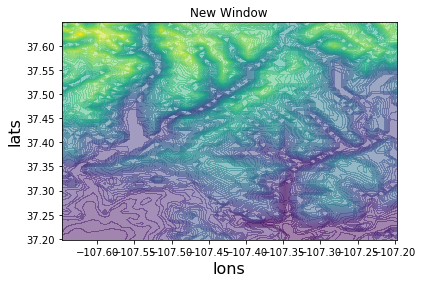

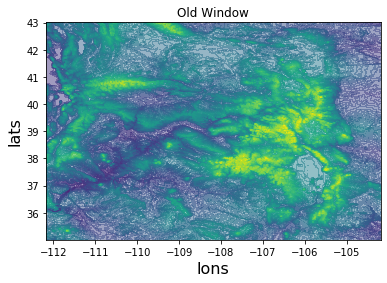

In [6]:
#This is our new window
bbox = [-107.65, -107.2, 37.2, 37.65] #lon_left lon_right lat_low lat_high

obj.new_window(bbox, 4) #The file will be BOX4_...
#Note that it is already in kilometers

# A4

We 'upsample' our data with different methods to get a higher resolution. 

We experiment with nearest neighbor, linear, and cubic methods

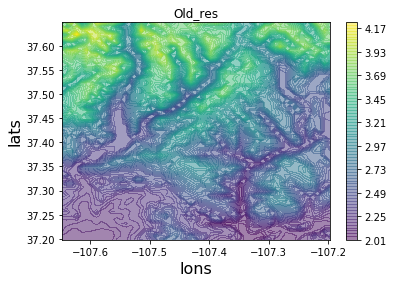

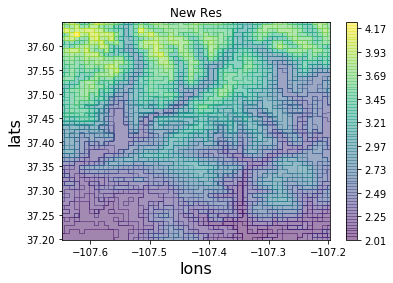

In [7]:
obj = topo_tools('BOX4_topo.npy', 'BOX4_lons.npy', 'BOX4_lats.npy')
obj.new_res(1000, method = 'nearest')
#This produces the worst results

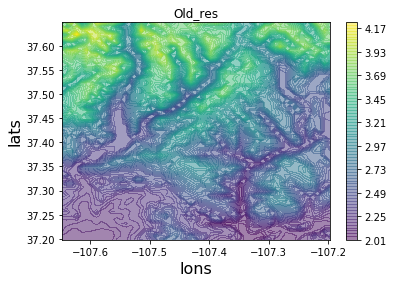

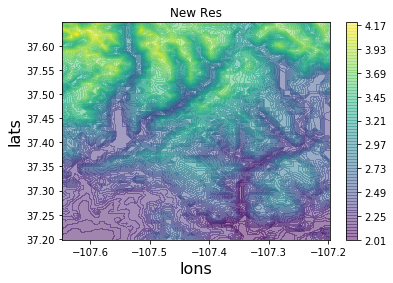

In [8]:
obj.new_res(1000, method = 'linear')
#These results are better.

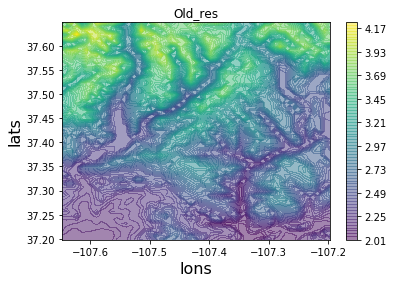

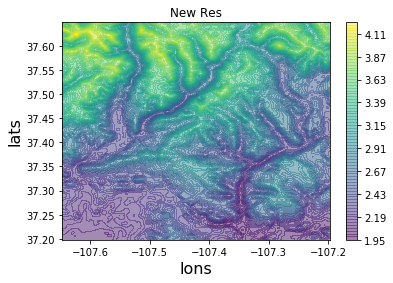

In [9]:
obj.new_res(1000, method = 'cubic')
#This looks the best in my opinion.

In [10]:
#Load in the upsampled window
obj = topo_tools('BOX4_1000_topo.npy', 'BOX4_1000_lons.npy', 'BOX4_1000_lats.npy')
#Note that it is already in kilometers

# B2

We construct a view area in a few locations, assuming the height of the person is 1.75 meters

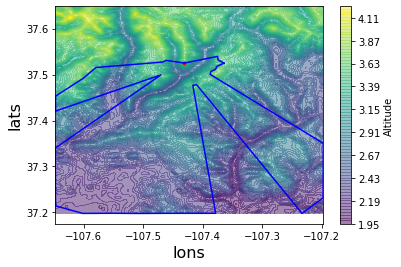

In [11]:
v1 = np.array([-107.431, 37.5248])
v2 = np.array([-107.56, 37.25])
v3 = np.array([-107.346, 37.2752])

obj.view_area(v1,50) #again 50 is the 'resolution' of the circle or the number of 'rays' that we cast out.
#obj.view_area(v2,50)
#obj.view_area(v3,50)

In [12]:
#%matplotlib 

# B.3

We check the slope in all eight directions around our point, note that the top left corner is index 0,0 so when the output says (0,1) that is one step to the right, (-1,1) one step up and to the right etc.

Using the %matplolib function will allow you to zoom in and see the eight points.

For debugging the output is printing step direction, calculated slope in degrees, center point height, direction height.

We need to examin arctan further to completely understand what is going on here, but it is sufficient to note at the moment that upward slopes are negative and downward slopes are positive.

In [16]:
#obj.check_steepness(np.array([-107.45, 37.45]), plot = True)

# B.4

To define a walking speed we first consult experts in trail construction at https://www.nps.gov/noco/learn/management/upload/NCT_CH4.pdf

There they note that most trails are between 0 and 16 degrees, but they can be up to 30 degrees if necessary. From this information we extrapolate and build a function that determins walking speed based off of the current slope. 

I have determined through trial and error that an 18 degree chebychev interpolation looks good enough.

Note however that this graph is backwards of the way it should be. It was constructed under the assumption that negative degrees were downhill, this is not the case.

The idea is that going down really steep slopes is more treacherous so you slow down more rapidly, whereas going uphill is less treacherous so your speed drops off less slowly. 

The second graph displays the discontinous fit that we constructed.

x [-90 -80 -66 -45 -30 -15   0  15  30  45  55  72  90]
y [1.0e-05 1.0e-05 1.0e-05 1.0e-03 5.0e-01 4.8e+00 3.2e+00 2.8e+00 2.3e+00
 5.0e-01 1.0e-05 1.0e-05 1.0e-05]


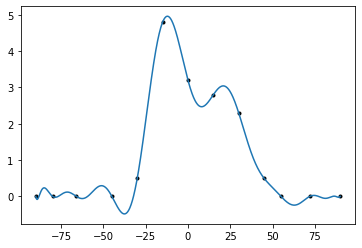

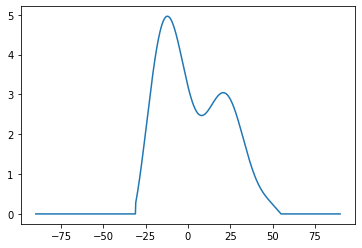

In [17]:
poly = obj.fit_cheby(18,plot = True, p_xy = True)

d = np.linspace(-90,90, 1000)  
out = []
for i in d:
    out.append(obj.func(i))
fig = plt.figure()
plt.plot(d,out )

# B.5, B5.1

The purpose is to be given a starting point, a time limit, and a direction and the little person will walk at a speed determined by B.4 until the time runs out. 

Again note that B.4 is the mirror of what we want it to be, but it is sufficient for what we are testing today.

As it turns out the B.4 is way too restrictive so it will need to be reworked and benchmarked in order to be useful.

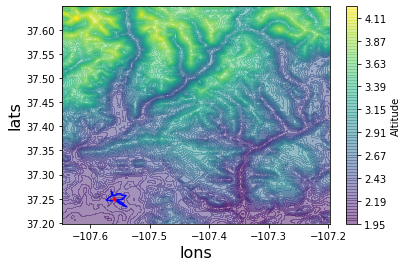

In [18]:
obj.hours_after(v2,4, 50)

# B.6 TODO

# B.7 RANDOM WALK

This is still not totally implemented, currently it simply chooses a random direction to step in and then takes a step.

The bboxes parameter is set up to allow for zones to be defined so that statistics can be calculated.


0 True
-107.53657289235304 37.46715228186468
0 True
-107.50762697088503 37.48751544380733
0 True
-107.5351619044178 37.389169398826624
0 True
-107.37767247086022 37.52192186017531
0 True
-107.3936616367385 37.46847410810246


/Users/garretcarver/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


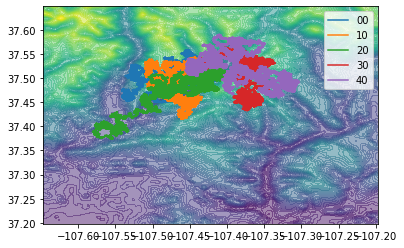

In [19]:
bboxes = [bbox]
starts = [v1]

obj.test_rand_walkers(5, bboxes, starts, 100000)

# Section C: Feature Extraction
# C.1 Extract the long/lat distance between steps in the topography grid.

This is simple enough since we have from the file the beginning and end corrdinates for both longitude and latitude and how many points there are inbetween.
I construct an object called 

    self.lon_domain = np.linspace(self.lon_left, self.lon_right, self.lon_n).astype('float32')

and then calculate

    self.xeps       = abs(self.lon_domain[0] - self.lon_domain[1])

in our case we have 

In [20]:
obj = topo_tools('OG_topo.npy', 'OG_lons.npy', 'OG_lats.npy')
print('original degree step size',obj.xeps, ' ', obj.yeps)
obj = topo_tools('BOX4_1000_topo.npy', 'BOX4_1000_lons.npy', 'BOX4_1000_lats.npy')
print(' New window/res step size', obj.xeps, obj.yeps)

original degree step size 0.008331299   0.008331299
 New window/res step size 0.00045013428 0.00045013428


# C.2, C.3 How many kilometers in a degree/step

After using the usgs length feature I determined that there are 111.13014012508017 km per degree latitude and 90.97190820834038 km per degree longitude.

From here it is simple to determine how many kilometers are in a step, we have 

		self.ykm_step = self.ykm_deg * self.yeps
		self.xkm_step = self.xkm_deg * self.xeps
    




In [21]:
obj = topo_tools('OG_topo.npy', 'OG_lons.npy', 'OG_lats.npy')
print('original    km per step',obj.xkm_step, ' ', obj.ykm_step)
obj = topo_tools('BOX4_1000_topo.npy', 'BOX4_1000_lons.npy', 'BOX4_1000_lats.npy')
print('New win/res km per step', obj.xkm_step, obj.ykm_step)

original    km per step 0.7579141522484413   0.9258584061934475
New win/res km per step 0.040949574159943256 0.05002348531631264


# C.4, C.5 Average walking speed, time per step    
    
By doing some simple searches online I learned that on average people hike somewhere between 3.2km/hr and 4.8km/hr so I arbitrarily decided to make 3.2km/hr the average and 4.8km/hr the max and 1e-5 the min.

Given that 3.2km/hr is the average walking speed the average time-step size necessary to take a step from one grid point to the other is 
    
    self.xdt = self.xeps * self.xkm_deg / self.xvel

Since there will be two of these time steps we will choose the larger one so that we are not assuming information from stepping to finely in one direction, and will simply be loosing a little information in the other direction.

    self.dt = max(self.xdt,self.ydt)

In [22]:
obj = topo_tools('OG_topo.npy', 'OG_lons.npy', 'OG_lats.npy')
print('original    time step',obj.xdt, obj.ydt, obj.dt)
obj = topo_tools('BOX4_1000_topo.npy', 'BOX4_1000_lons.npy', 'BOX4_1000_lats.npy')
print('New win/res time step', obj.xdt, obj.ydt, obj.dt)

#this is in hours

original    time step 0.23684817257763788 0.2893307519354523 0.2893307519354523
New win/res time step 0.012796741924982266 0.0156323391613477 0.0156323391613477


# C.6, C.7 Calculate a gradient for the topography and convert to degrees

I thought that this would be a simple thing by using numpy.gradient on the topography data, however this has proven difficult to understand. 

We get self.gradx, self.grady = np.gradient(self.topo)

In an attempt to understand the data we use pythagoreans theorem to determine the angle between every point on the map by using 

self.gradient = np.degrees(np.arctan(self.grady / self.gradx)) 

plotting this gives me a vague idea of what is happening however it is still difficult to understand due to the fact that the gradient is extremely dependent on direction and I am not completely sure of what direction this information is giving me.

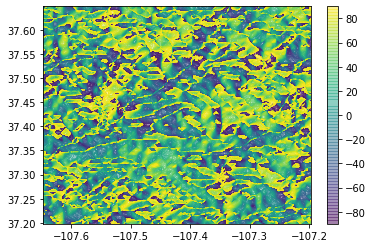

In [23]:
obj.plot_degree_slope()

There is an inherant weakness in that I don't actually have data to do statictics on, however I believe that I will be able to generate something worthy of study before the end of the semester. Currently my plan is to get the random walk working correctly and then I will be able to study the statistics of where they random walkers end up. Given that they are influenced by the terrain there should be usefull information to be extracted.

# D.1 random walk implementation for data visulaization

This does not look much different from what I have produced before however I have finally resolved a number of major indexing problems that has plagued the project from the beginning. I now am able to properly get the height from a given lat/long coordinate and also able to index around in the topography file. 

Here 'Thing' is two lists of all of the starting points and ending points, the idea is to divide up the topography with an equally sized grid and then construct a directed graph representation of the topography by counting the proportion of random walkert that go from one grid block to another. 

Attempting to visualize the data at the moment is totally worthless due to the walkers getting trapped in infinite loops when they find a local minimum. Currently the are motivated to walk as fast as possible which means that once they find a local minimum the take one step out of the 'hole' and then step back into it indefinatly.

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
8 8
9 8
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


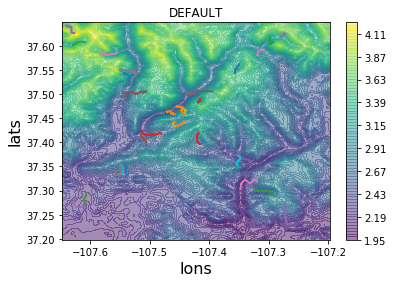

In [25]:
thing = obj.test_rand_walkers2(10)  